In [10]:
# Victor Z and David Cole
# UW-Madison, 2024
# generator sizing example (deterministic solution)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from statsmodels.distributions.empirical_distribution import ECDF

# Function Definitions

def myfun(u, X):
    R = np.maximum(X - u, 0)
    return 5 * (R**2) + 15 * u**2

# Generate scenarios for random load
np.random.seed(0)
N = 1000
X = weibull_min.rvs(2, scale=10, size=N)

# Find deterministic solution
u = np.arange(0, 11, 2)
x = np.max(X)

yd = [myfun(uk, x) for uk in u]

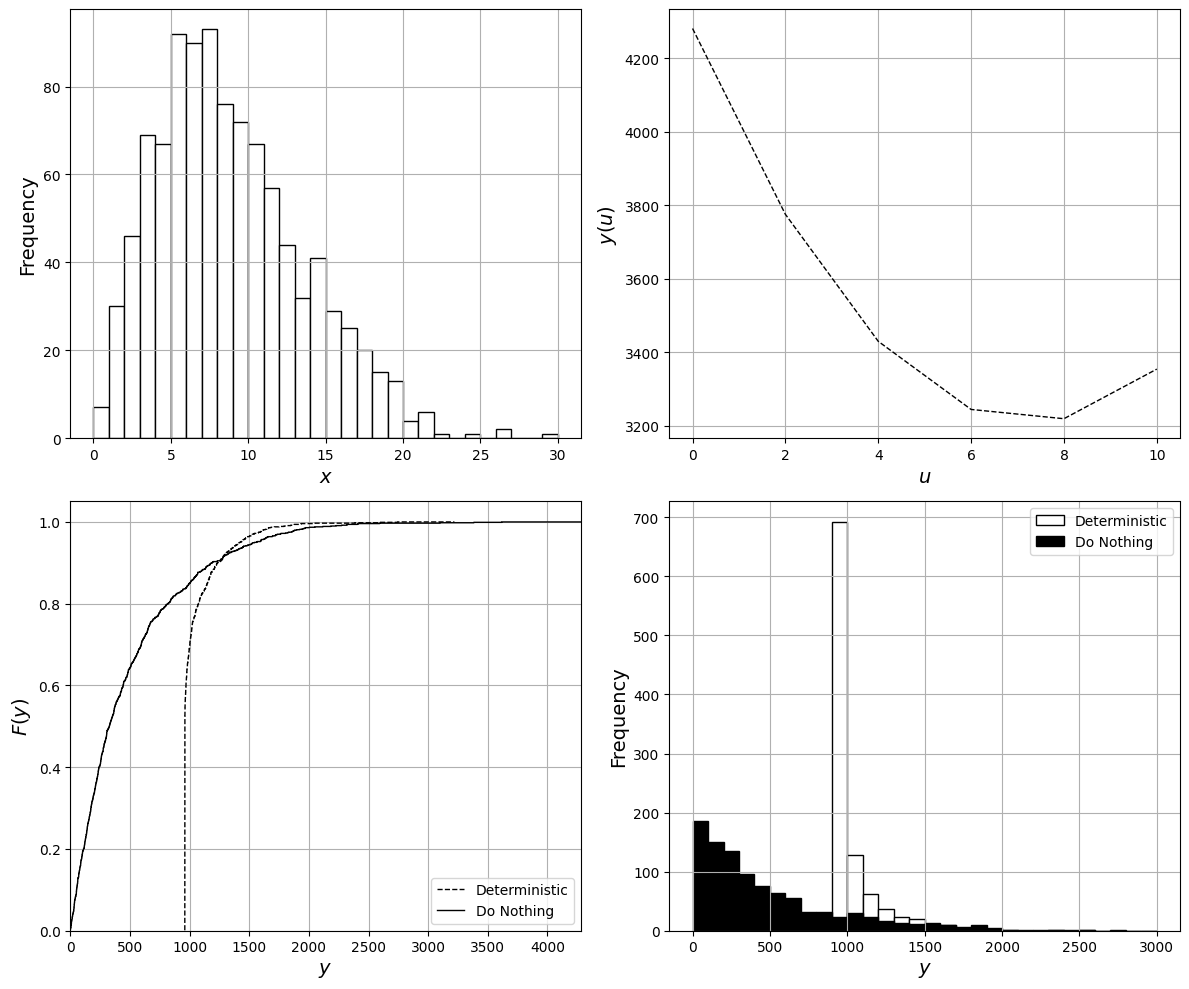

In [12]:
# Visualize deterministic objective against decision
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].grid(True)
axs[0, 0].hist(X, bins=np.arange(0, 31, 1), edgecolor='black', facecolor='white', linewidth=1)
axs[0, 0].set_xlabel('$x$', fontsize=14)
axs[0, 0].set_ylabel('Frequency', fontsize=14)

axs[0, 1].grid(True)
axs[0, 1].plot(u, yd, linewidth=1, color='black', linestyle='--')
axs[0, 1].set_xlabel('$u$', fontsize=14)
axs[0, 1].set_ylabel('$y(u)$', fontsize=14)

# Find optimal size that
idx = np.argmin(yd)
ud = u[idx]

# Evaluate how the deterministic solution ud behaves when it confronts uncertainty
yd = myfun(ud, X)

ecdf_yd = ECDF(yd)

axs[1, 0].grid(True)
axs[1, 0].step(ecdf_yd.x, ecdf_yd.y, linewidth=1, color='black', linestyle='--')

axs[1, 1].grid(True)
axs[1, 1].hist(yd, bins=np.arange(0, 3100, 100), edgecolor='black', facecolor='white', linewidth=1)

# Mean
Ed = np.mean(yd)

# Compare against do nothing
u0 = 0
y0 = myfun(u0, X)

ecdf_y0 = ECDF(y0)

axs[1, 0].step(ecdf_y0.x, ecdf_y0.y, linewidth=1, color='black', linestyle='-')
axs[1, 0].set_xlim([0, np.max(y0)])
axs[1, 0].set_ylim([0, 1.05])
axs[1, 0].set_xlabel('$y$', fontsize=14)
axs[1, 0].set_ylabel('$F(y)$', fontsize=14)
axs[1, 0].legend(['Deterministic', 'Do Nothing'], loc='lower right')

axs[1, 1].hist(y0, bins=np.arange(0, 3100, 100), edgecolor='black', facecolor='black', linewidth=1)
axs[1, 1].legend(['Deterministic', 'Do Nothing'])
axs[1, 1].set_xlabel('$y$', fontsize=14)
axs[1, 1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

# Mean
E0 = np.mean(y0)